<h1>1. Introducción</h1>

<p>Según los úlimos estudios llevados a cabo por las grandes empresas del sector, a finales de 2018 se preveía que más de 3.000 millones de personas iban a ser usuarios de un <i>"Smartphone"</i>. De esos 3.000 millones, 2.200 millones utilizan el sistema operativo <b>Android</b>. Este SO admite el uso de aplicaciones llamadas <i>Apps</i> para dar al usuario una gran cantidad de versatilidad a la hora de utilizar su dispositivo.</p>

<p>Por ello se ha escogido el dataset llamado <b>Google Play Store Apps</b>, que consta de 13 variables que definen diferentes cuestiones de la aplicación.<p>

<h1>2. Variables</h1>

Las variables que se utilizarán en el estudio de las aplicaciones son las siguientes:

* App (String): Nombre de la aplicación.
* Category (String): Categoría de la aplicación.
* Rating (Decimal): Valoración global de la aplicación.
* Reviews (Integer): Número de reviews.
* Size (String): Tamaño de la aplicación.
* Installs (String): Número de veces que se ha instalado la aplicación.
* Type (String): Gratuita o de pago.
* Price (String): Precio de la aplicación en caso de que sea de pago.
* Content Rating (String): Público objetivo en base a la edad.
* Genres (String): Género de la aplicación, por ejemplo, Musical Family Game, puede tener los géneros 'música', 'juego', 'familiar'.
* Last Updated (Date): Fecha de la última actualización de la aplicación.
* Current Ver (String): Versión actual de la aplicación.
* Android Ver (String): Mínima versión requerida de Android para que funcione la aplicación.

<h1>3. Preparación del set de datos</h1>

<p>Antes de empezar a analizar los datos, es importante recogerlos de la misma forma que en el dataset original. Este apartado se dedicará exclusivamente a la preparación y limpieza de los datos del dataset.</p>

In [70]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
#Carga del dataframe

df = pd.read_csv('datasets/googleplaystore.csv',
                 na_values = ['NaN'],
                 dtype = {'App':str, 
                          'Category':str, 
                          'Rating':'float16',
                          'Reviews':object,
                          'Size':str,
                          'Installs':str,
                          'Type':str,
                          'Price':str,
                          'Content Rating':str,
                          'Genres':str,
                          'Last Updated':object,
                          'Current Ver':str,
                          'Android Ver':str                      
                         })

#Para evitar problemas con los espacios en los nombres de las columnas, se renombran sin espacios.

df.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'ContentRating', 'Genres', 'LastUpdated',
             'CurrentVer', 'AndroidVer']

# Debido a una fila corrupta, hay que cargar las columnas con el tipo 'object' ya que al intentar cargar las columnas en su 
# tipo original, da problemas de conversión.

print(df.dtypes)

#Limpieza del dataframe

# Por lo tanto, una vez localizada la fila corrupta, se elimina accediendo a través de su índice
# filtrando la línea a través de uno de los datos corruptos (categoría = 1.9).

df = df.drop(df[df.Category == '1.9'].index)

#Una vez eliminada la fila conflictiva, se toma la columna Reviews como integer.

df['Reviews'] = df['Reviews'].astype('int16')

df['LastUpdated'] = df['LastUpdated'].astype('datetime64')

print(df.dtypes)

# Se va a modificar también la columna Installs para poder operar con el número de instalaciones.
# El número será un valor aproximado ya que el número de instalaciones no es concreto (10.000+ por ejemplo).
# Se cogerá el número estimado, es decir 10.000+ = 10.000

df['Installs'] = df.Installs.str.replace('+','')
df['Installs'] = df.Installs.str.replace(',','')

df['Installs'] = df.Installs.astype(int)

print(df.dtypes)


App               object
Category          object
Rating           float16
Reviews           object
Size              object
Installs          object
Type              object
Price             object
ContentRating     object
Genres            object
LastUpdated       object
CurrentVer        object
AndroidVer        object
dtype: object
App                      object
Category                 object
Rating                  float16
Reviews                   int16
Size                     object
Installs                 object
Type                     object
Price                    object
ContentRating            object
Genres                   object
LastUpdated      datetime64[ns]
CurrentVer               object
AndroidVer               object
dtype: object
App                      object
Category                 object
Rating                  float16
Reviews                   int16
Size                     object
Installs                  int32
Type                     object
Price  

<h1>4. Datos de interés sobre el dataset</h1>

<p>Durante esta sección del notebook, se mostrarán de forma gráfica los datos de interés del dataset. Antes del código y la muestra de las gráficas, se explicará en qué consiste el análisis y por qué puede tener interés</p>

<h2>4.1 Categoría</h2>
    
<p>Al disponer de más de 10.000 datos, se puede determinar con cierto rigor la cantidad de aplicaciones que hay de cada categoría en el market. En el siguiente gráfico, se muestra el porcentaje de cada categoría.</p>

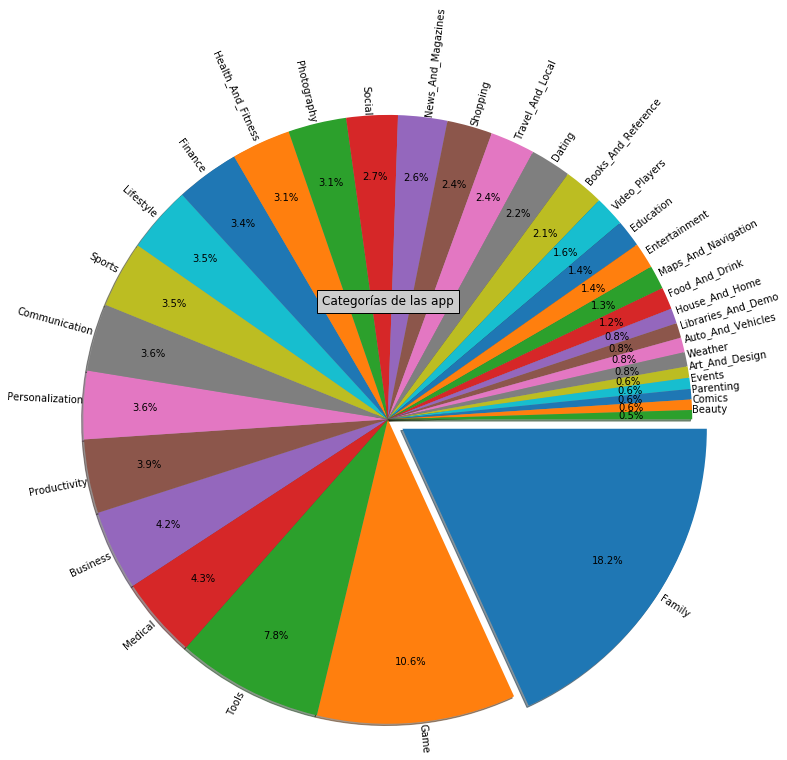

In [4]:
#Gráfica de tarta con los géneros de las aplicaciones.

dfCategory = df.groupby('Category').size().reset_index(name='Count').sort_values(by=['Count'], ascending = False)

dfCategory

#print(dfCategory)

categories = dfCategory['Category'].str.title()
count = dfCategory['Count']
explode = np.zeros((len(categories)))
explode[0] = 0.2

plt.pie(count, labels=categories, shadow=True, startangle=0, radius=3.5, autopct='%1.1f%%', 
        pctdistance=0.8, labeldistance=1, rotatelabels=True, counterclock = False, explode=explode)

plt.title("Categorías de las app", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


<p>Como se puede apreciar, casi el 20% de las aplicaciones son de la categoría <i>FAMILY</i>, indicativo de que la gran mayoría del público busca aplicaciones sencillas y útiles para el día a día.</p>

<p>A continuación se muestra la relación entre las aplicaciones de tipo <i>FAMILY</i> con el rango de edad para verificar que las aplicaciones son para todos los públicos.</p>

  ContentRating  Count
0      Everyone   1529
3          Teen    261
1  Everyone 10+    131
2    Mature 17+     50
4       Unrated      1


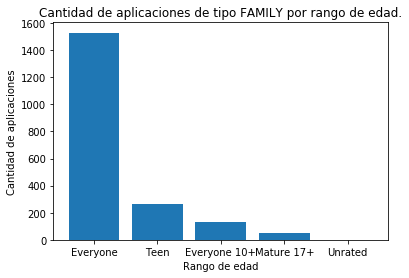

In [5]:
dfFamily = df.loc[df['Category'] == 'FAMILY']
dfContentRatingFamily = dfFamily.groupby('ContentRating').size().reset_index(name='Count').sort_values(by=['Count'], ascending = False)

print(dfContentRatingFamily)

x = dfContentRatingFamily['ContentRating'].str.title()
y = dfContentRatingFamily['Count']

plt.title("Cantidad de aplicaciones de tipo FAMILY por rango de edad.")
plt.xlabel("Rango de edad")
plt.ylabel("Cantidad de aplicaciones")
plt.bar(dfContentRatingFamily['ContentRating'], height=dfContentRatingFamily['Count'])

plt.show()

<p>Con la anterior gráfica de barras se verifica lo que se esperaba.</p>

<p>Una vez visto que la categoría de la que más aplicaciones existen en el mercado es la categoría FAMILY, es interesante saber si la cantidad de descargas total de aplicaciones por categoría, sigue el mismo orden que las categorías.</p>

                    SumaInstalaciones
Category                             
GAME                      35086024415
COMMUNICATION             32647276251
PRODUCTIVITY              14176091369
SOCIAL                    14069867902
TOOLS                     11452771915
FAMILY                    10258263505
PHOTOGRAPHY               10088247655
NEWS_AND_MAGAZINES         7496317760
TRAVEL_AND_LOCAL           6868887146
VIDEO_PLAYERS              6222002720


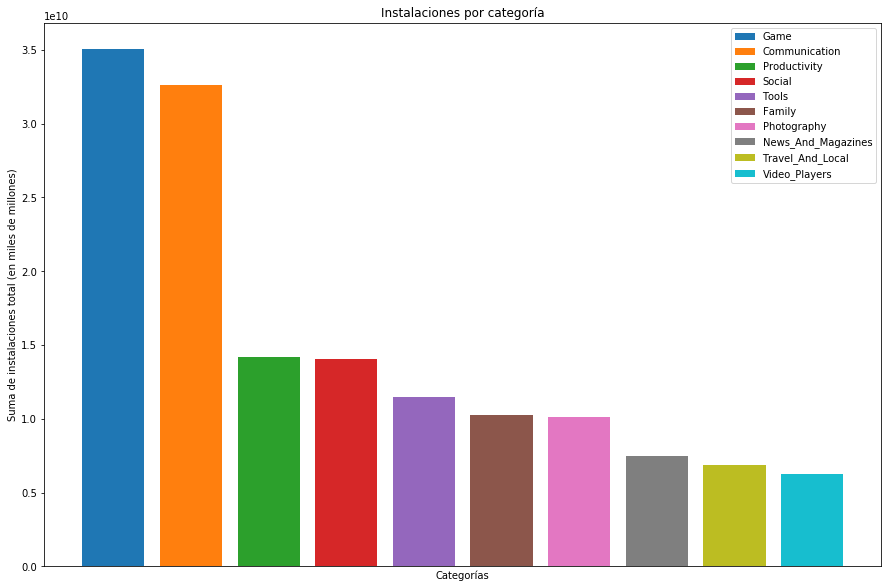

In [6]:
def sumInstallsCategory(xDf):
    names = {
        'SumaInstalaciones': xDf['Installs'].sum(),
    }

    return pd.Series(names, index=['SumaInstalaciones'])

dfInstalls = df.groupby('Category').apply(sumInstallsCategory).sort_values(by=['SumaInstalaciones'], ascending = False).head(10)

# Para que se vean mejor los datos, se ha decidido sacar el top 10 de categorías en número de descargas.

print(dfInstalls)

x = dfInstalls.index.values
y = dfInstalls['SumaInstalaciones']

plt.figure(figsize=(15,10))
plt.title("Instalaciones por categoría")
plt.xlabel("Categorías")
plt.ylabel("Suma de instalaciones total (en miles de millones)")

for i in range(0, len(x)):
    plt.bar(x[i], height=y[i], label=x[i].title())

plt.xticks([])
plt.legend()

plt.show()

<p>El hecho de que haya más aplicaciones de la categoría <i>Family</i> no implica que sean las más descargadas. De hecho, en la gráfica se puede apreciar que con bastante diferencia, las categorías que más descargas tienen <i>Game</i> y <i>Communication</i>.</p>

<p>El dataset ofrece la valoración media de cada aplicación. Es interesante saber la nota media general, así como la máxima nota, la mínima, el rango y la desviación agrupado por categoría.</p>

In [7]:
def meanMaxMinStd(xDf):
    names = {
        'Media': xDf['Rating'].mean(),
        'NotaMax':  xDf['Rating'].max(),
        'NotaMin':  xDf['Rating'].min(), 
        'Rango': xDf['Rating'].max() - xDf['Rating'].min(),
        'Desviacion':  xDf['Rating'].std()
    }

    return pd.Series(names, index=['Media', 'NotaMax', 'NotaMin',
                                   'Rango', 'Desviacion'])

dfRating = df.groupby('Category').apply(meanMaxMinStd)

dfRating


,Media,NotaMax,NotaMin,Rango,Desviacion
Category,,,,,
ART_AND_DESIGN,4.359375,5.000000,3.199219,1.800781,0.357910
AUTO_AND_VEHICLES,4.191406,4.898438,2.099609,2.798828,0.543945
BEAUTY,4.281250,4.898438,3.099609,1.798828,0.362305
BOOKS_AND_REFERENCE,4.343750,5.000000,2.699219,2.300781,0.428955
BUSINESS,4.121094,5.000000,1.000000,4.000000,0.624512
COMICS,4.156250,5.000000,2.800781,2.199219,0.538086
COMMUNICATION,4.160156,5.000000,1.000000,4.000000,0.426025
DATING,3.972656,5.000000,1.000000,4.000000,0.630371
EDUCATION,4.390625,4.898438,3.500000,1.398438,0.251709


<p>Teniendo la media de las valoraciones de todas las categorías, podemos ver qué categorías están por encima y por debajo de la media global. </p>

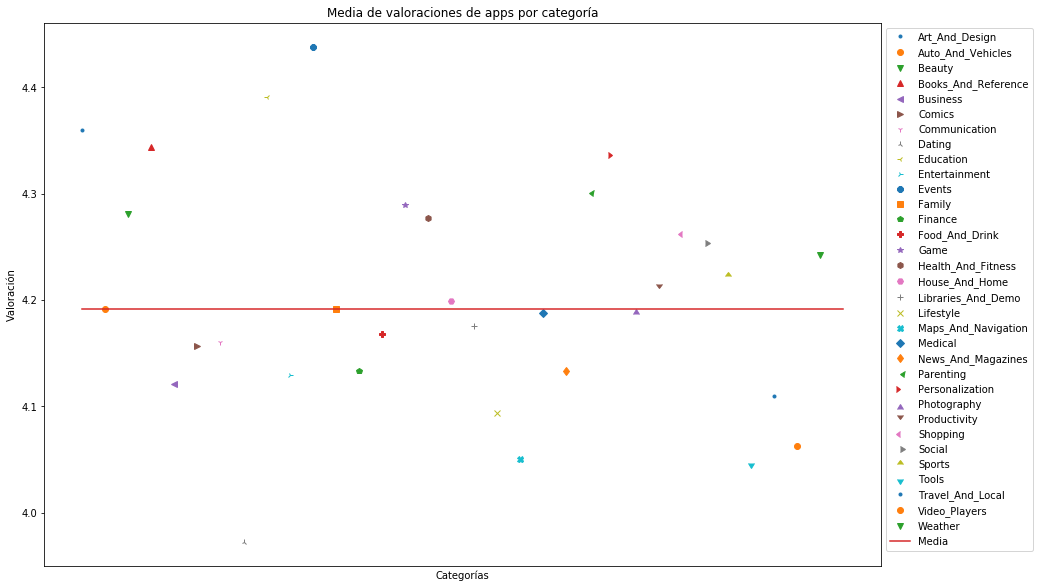

In [51]:
totalMean = df.Rating.mean()

x = dfRating.index.str.title()
y = dfRating['Media']

plt.figure(figsize=(15,10))
plt.title("Media de valoraciones de apps por categoría")
plt.xlabel("Categorías")
plt.ylabel("Valoración")

for i in range(0, len(x)):
    markers = [".", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", 4, 5, 6, 7, 8, 9, 10, 11, ".", "o", "v", "^", "<", ">"]
    plt.plot(x[i], y[i], 'o', label=x[i], marker=markers[i])

x1 = [0, len(x)]
y1 = [totalMean, totalMean]
plt.plot(x1, y1, label='Media')

plt.xticks([])
plt.legend(loc='best', bbox_to_anchor=(1, 1))

plt.show()

<h2>4.2 Valoración de las aplicaciones</h2>

<p>Una vez estudiado algunas situaciones en base a la categoría de la aplicación, ligado al tema anterior, puede ser interesante estudiar la relación entre la valoración de las aplicaciones y otras variables.</p> 

<p>Lo primero de todo se mostrará un histograma con la frecuencia de las valoraciones, con estos datos nos podemos hacer una idea de la distribución de las valoraciones.</p>

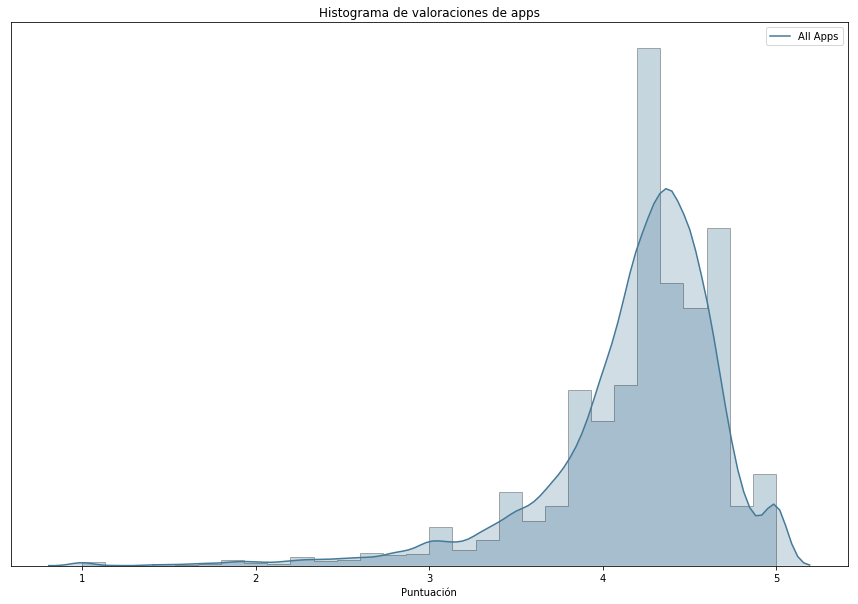

In [102]:
plt.figure(figsize=(15,10))
plt.title("Histograma de valoraciones de apps")
plt.xlabel("Puntuación")
plt.yticks([])


plt.hist(df.Rating, bins=30, histtype="stepfilled", color="#457998", edgecolor="black", alpha=0.3, density=True)
sns.kdeplot(df.Rating[df.Type == 'Free'], shade=True, color="#457998", label='All Apps')

plt.show()

<p>En este primer ejemplo, se estudia la relación que puede tener la valoración de una aplicación con respecto a si es de pago o no. En teoría, una aplicación de pago implica más inversión y mejor calidad de una aplicación. Por lo tanto, las valoraciones se presuponen mayores con respecto a las aplicaciones gratuitas.</p>

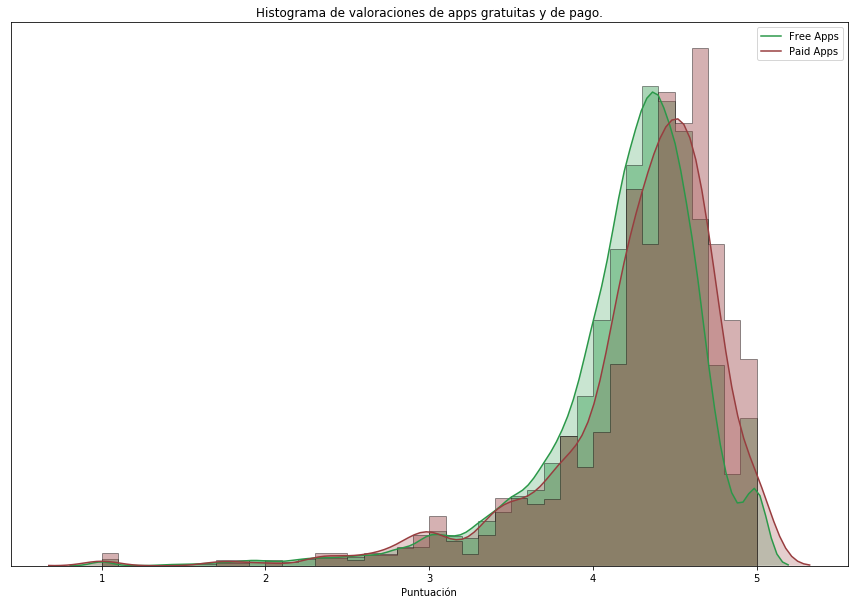

In [100]:
plt.figure(figsize=(15,10))
plt.title("Histograma de valoraciones de apps gratuitas y de pago.")
plt.xlabel("Puntuación")
plt.yticks([])


plt.hist(df.Rating[df.Type == 'Free'], histtype="stepfilled", bins=40, color="#2B9849", edgecolor="black", density=True, alpha=0.4)
plt.hist(df.Rating[df.Type == 'Paid'], histtype="stepfilled", bins=40, color="#983D3F", edgecolor="black", density=True, alpha=0.4)

sns.kdeplot(df.Rating[df.Type == 'Free'], shade=True, color="#2B9849", label='Free Apps')
sns.kdeplot(df.Rating[df.Type == 'Paid'], shade=True, color="#983D3F", label='Paid Apps')

plt.show()

<p>Como se puede en el histograma, las aplicaciones de pago están mejor valoradas que las gratuitas, por lo que se confirma lo dicho anteriormente.</p>

<p>A continuación se va a estudiar la relación entre el número de reviews que tiene una aplicación y la valoración media.</p>

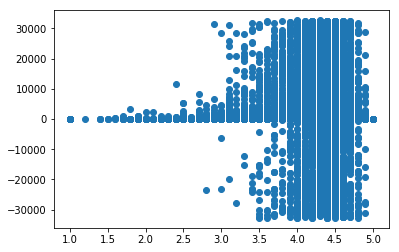

In [106]:
x = df.Rating
y = df.Reviews

plt.scatter(x, y)

<p>resultados</p>

<p>También puede ser interesante ver la influencia que tienen las actualizaciones de la app para la valoración de la misma. Para ello, se van a agrupar por fecha de última actualización las apps y se va a sacar la valoración media de las aplicaciones. Para no acumular demasiados datos, se va a sacar la media anual de las valoraciones. En teoría, las aplicaciones más cerca de la fecha en la que se recogieron los datos (8 de Agosto de 2018), mejor valoración deberían tener.</p>

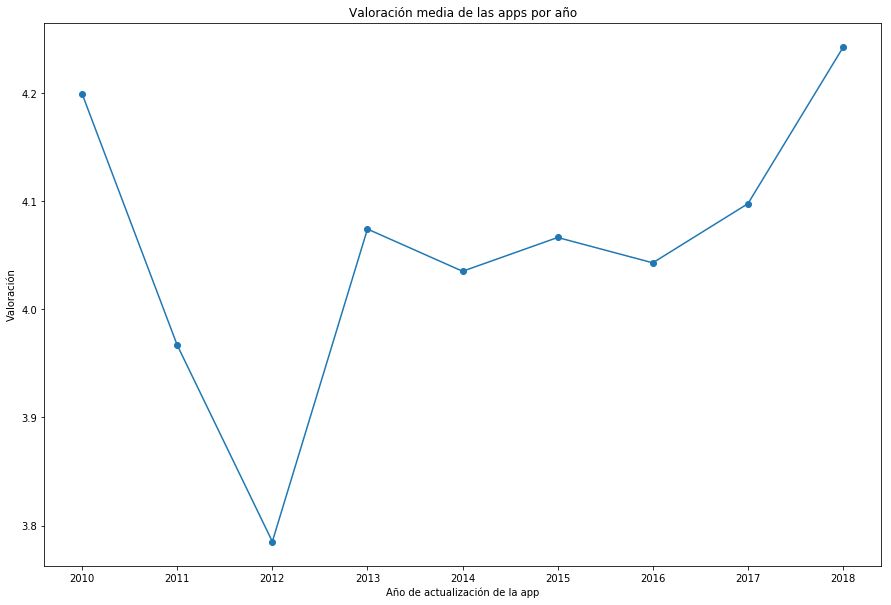

In [130]:

def mediaPorActualizacion(xDf):
    names = {
        'Media': xDf['Rating'].mean()
    }

    return pd.Series(names, index=['Media'])

dfUpdated = df.groupby(df['LastUpdated'].dt.year).apply(mediaPorActualizacion).sort_values(by=['LastUpdated'], ascending = True)

dfUpdated = dfUpdated.dropna()

x = dfUpdated.index.values
y = dfUpdated.Media

plt.figure(figsize=(15,10))
plt.title("Valoración media de las apps por año")
plt.xlabel("Año de actualización de la app")
plt.ylabel("Valoración")
plt.plot(x, y, '-o')

plt.show()

<p>Si que parece que hay una mejora aunque no muy importante respecto a la hora de valorar las aplicaciones con actualizaciones más cercanas a la fecha en la que se recopilaron los datos.</p>

<p>Por último, se va a ver si influye el tamaño de la aplicación a la hora de valorar las aplicaciones y de instalarlas.</p>

,Rating,Reviews,Installs
Rating,1.000000,-0.008681,0.051320
Reviews,-0.008681,1.000000,-0.029029
Installs,0.051320,-0.029029,1.000000


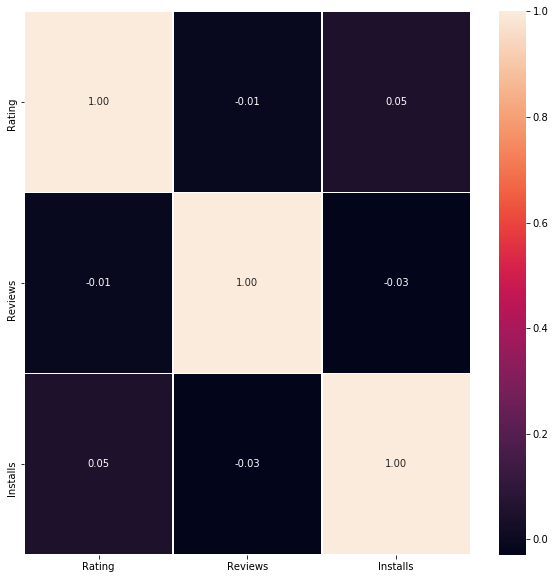

In [143]:
y = df.Size

x1 = df.Installs
x2 = df.Rating

f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = ".2f", ax=ax)

df.corr()

<h1>5. Dataset de valoraciones de los usuarios</h1>

<p>Junto con el dataset con la información de las aplicaciones, se facilitaba también un dataset con las diferentes valoraciones para cada aplicación. A continuación se cargará este dataset y se unirá junto al dataset anterior para estudiar algunos casos.</p>

In [137]:
dfUsersRating = pd.read_csv('datasets/googleplaystore_user_reviews.csv',
                 na_values = ['nan'],
                 dtype = {'App':str, 
                          'Translated_Review':str, 
                          'Sentiment':object,
                          'Sentiment_Polarity':float,
                          'Sentiment_Subjectivity':str                    
                         })

#Para evitar problemas con los espacios en los nombres de las columnas, se renombran sin espacios.

dfUsersRating.columns = ['App', 'TranslatedReview', 'Sentiment', 'SentimentPolarity',
             'Sentiment_Subjectivity']

dfUsersRating = dfUsersRating.dropna()

,App,TranslatedReview,Sentiment,SentimentPolarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.5333333333333333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.28846153846153844
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.3
5,10 Best Foods for You,Best way,Positive,1.000000,0.3
6,10 Best Foods for You,Amazing,Positive,0.600000,0.9
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.0
10,10 Best Foods for You,good you.,Positive,0.700000,0.6000000000000001
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.1
